# ANÁLISIS BÁSICOS PARA POZO Y

In [44]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image as im

In [45]:
basicos_pozo_y=pd.read_csv("Básicos Pozo Y.csv", delimiter=";")

In [46]:
basicos_pozo_y.columns

Index(['Profundidad', 'Unnamed: 1', 'Densidad', 'Porosidad', 'K @ NMS',
       'Unnamed: 5', 'Porosidad.1', 'K aire'],
      dtype='object')

In [47]:
basicos_pozo_y.columns=['Profundidad (ft)', 'Profundidad (m)', 'Densidad de Granos (g/cc)', 'Porosidad @ NMS (%)', 'K @ NMS (md)',
       'K @ NMS (mm2)', 'Porosidad Conv. (%)', 'K aire (md)']

In [48]:

basicos_pozo_y=basicos_pozo_y.drop([0],axis=0)
basicos_pozo_y=basicos_pozo_y.reset_index(drop=True)

In [49]:
basicos_pozo_y.dtypes

Profundidad (ft)             object
Profundidad (m)              object
Densidad de Granos (g/cc)    object
Porosidad @ NMS (%)          object
K @ NMS (md)                 object
K @ NMS (mm2)                object
Porosidad Conv. (%)          object
K aire (md)                  object
dtype: object

In [50]:
basicos_pozo_y=basicos_pozo_y.astype({'Profundidad (ft)':'float64', 'Profundidad (m)':'float64', 'Densidad de Granos (g/cc)':'float64','Porosidad @ NMS (%)':'float64',
                                      'K @ NMS (md)':'float64','K @ NMS (mm2)':'float64','Porosidad Conv. (%)':'float64','K aire (md)':'float64' })

In [51]:
basicos_pozo_y.dtypes

Profundidad (ft)             float64
Profundidad (m)              float64
Densidad de Granos (g/cc)    float64
Porosidad @ NMS (%)          float64
K @ NMS (md)                 float64
K @ NMS (mm2)                float64
Porosidad Conv. (%)          float64
K aire (md)                  float64
dtype: object

In [52]:
basicos_pozo_y

,Profundidad (ft),Profundidad (m),Densidad de Granos (g/cc),Porosidad @ NMS (%),K @ NMS (md),K @ NMS (mm2),Porosidad Conv. (%),K aire (md)
0,6240.6,1529.66928,2.656,16.235088,0.429437,0.000424,19.749489,3.006972
1,6242.3,1530.18744,2.632,15.893197,0.761182,0.000751,20.136478,7.583013
2,6243.5,1530.55320,2.653,19.499840,9.574795,0.009450,22.088410,16.434356
3,6244.7,1530.91896,2.650,23.674374,80.795960,0.079739,26.505995,105.322492
4,6245.3,1531.10184,2.640,21.641582,23.647195,0.023338,24.580986,38.574176
...,...,...,...,...,...,...,...,...
62,6346.3,1561.88664,2.630,25.464635,104.697952,0.103329,29.458644,174.643733
63,6347.6,1562.28288,2.603,22.510021,65.254513,0.064401,27.024437,121.523663
64,6348.2,1562.46576,2.630,25.131449,306.170579,0.302167,29.785017,451.892448
65,6351.3,1563.41064,2.629,27.061615,492.056365,0.485622,31.716626,631.007255


In [53]:
# Se utiliza un bucle while para dar ciertas reglas para cantidad de cifras decimales para la permeabilidad
i=0
teta=[]       
max_index = len(basicos_pozo_y['Profundidad (ft)'])

while i < max_index:
    if basicos_pozo_y.iloc[i,4]>=10:
        teta.append(int(basicos_pozo_y.iloc[i,4]))  
        i=i+1
    elif (basicos_pozo_y.iloc[i,4]>1) & (basicos_pozo_y.iloc[i,4]<10):
        teta.append(round(basicos_pozo_y.iloc[i,4],1))
        i=i+1
    elif (basicos_pozo_y.iloc[i,4]<1):
#         teta.append(np.format_float_scientific(basicos_pozo_y.iloc[i,4], precision = 2, exp_digits=3))
        teta.append(format(basicos_pozo_y.iloc[i,4],'.1E'))
        i=i+1
#         format(no1,'.1E')
 
i=0
peta=[]       
max_index = len(basicos_pozo_y['Profundidad (ft)'])

while i < max_index:
    if basicos_pozo_y.iloc[i,5]>=10:
        peta.append(int(basicos_pozo_y.iloc[i,5]))  
        i=i+1
    elif (basicos_pozo_y.iloc[i,5]>1) & (basicos_pozo_y.iloc[i,5]<10):
        peta.append(round(basicos_pozo_y.iloc[i,5],1))
        i=i+1
    elif (basicos_pozo_y.iloc[i,5]<1):
        peta.append(np.format_float_scientific(basicos_pozo_y.iloc[i,5], precision = 2, exp_digits=3))
        i=i+1

i=0
ñeta=[]
max_index = len(basicos_pozo_y['Profundidad (ft)'])

while i < max_index :
    if basicos_pozo_y.iloc[i,7]>=10:
        ñeta.append(int(basicos_pozo_y.iloc[i,7]))
        i=i+1
    elif (basicos_pozo_y.iloc[i,7]>1) & (basicos_pozo_y.iloc[i,7]<10):
        ñeta.append(round(basicos_pozo_y.iloc[1,7],1))
        i=i+1
    elif basicos_pozo_y.iloc[i,7] < 1:
        ñeta.append(np.format_float_scientific(basicos_pozo_y.iloc[i,7], precision=2, exp_digits=3))
        i=i+1


alpha=[]     
        
for x in basicos_pozo_y['Porosidad @ NMS (%)']:
    alpha.append((round(x,1)))
    
    
beta=[]
for x in basicos_pozo_y['Profundidad (m)']:
    beta.append((round(x,1)))


neta=[]     
        
for x in basicos_pozo_y['Porosidad Conv. (%)']:
    neta.append((round(x,1)))
    

In [54]:
basicos_pozo_y['K @ NMS (md)']=teta
basicos_pozo_y[	'K @ NMS (mm2)']=peta
basicos_pozo_y['Porosidad @ NMS (%)']=alpha
basicos_pozo_y['Profundidad (m)']=beta
basicos_pozo_y['Porosidad Conv. (%)']=neta
basicos_pozo_y['K aire (md)']=ñeta
    

In [55]:
basicos_pozo_y

,Profundidad (ft),Profundidad (m),Densidad de Granos (g/cc),Porosidad @ NMS (%),K @ NMS (md),K @ NMS (mm2),Porosidad Conv. (%),K aire (md)
0,6240.6,1529.7,2.656,16.2,4.3E-01,4.24e-004,19.7,7.6
1,6242.3,1530.2,2.632,15.9,7.6E-01,7.51e-004,20.1,7.6
2,6243.5,1530.6,2.653,19.5,9.6,9.45e-003,22.1,16
3,6244.7,1530.9,2.650,23.7,80,7.97e-002,26.5,105
4,6245.3,1531.1,2.640,21.6,23,2.33e-002,24.6,38
...,...,...,...,...,...,...,...,...
62,6346.3,1561.9,2.630,25.5,104,1.03e-001,29.5,174
63,6347.6,1562.3,2.603,22.5,65,6.44e-002,27.0,121
64,6348.2,1562.5,2.630,25.1,306,3.02e-001,29.8,451
65,6351.3,1563.4,2.629,27.1,492,4.86e-001,31.7,631


### Resumen de Estadístico

In [56]:
basicos_pozo_y['K @ NMS (md)']=basicos_pozo_y['K @ NMS (md)'].astype('float64')

basicos_pozo_y.dtypes

Profundidad (ft)             float64
Profundidad (m)              float64
Densidad de Granos (g/cc)    float64
Porosidad @ NMS (%)          float64
K @ NMS (md)                 float64
K @ NMS (mm2)                 object
Porosidad Conv. (%)          float64
K aire (md)                   object
dtype: object

In [57]:

porosidad=round(basicos_pozo_y[['Porosidad @ NMS (%)']].agg([min,max,np.median,np.mean,np.std]),2)
porosidad

,Porosidad @ NMS (%)
min,4.70
max,29.80
median,23.30
mean,21.26
std,6.33


In [58]:

d_g=round(basicos_pozo_y[['Densidad de Granos (g/cc)']].agg([len,min,max,np.median,np.mean,np.std]),3)
d_g

,Densidad de Granos (g/cc)
len,67.000
min,2.603
max,2.671
median,2.640
mean,2.642
std,0.014


In [59]:

perm=round(basicos_pozo_y[['K @ NMS (md)']].agg([len,min ,max,np.median,np.mean,np.std]),3)
perm


,K @ NMS (md)
len,67.000
min,0.002
max,2025.000
median,71.000
mean,222.600
std,402.776


## TABLA DE FRECUENCIAS POROSIDAD     


In [60]:




cola=[]
cola2=[]
cola4=[]
datos = np.zeros((10, 2))
df = pd.DataFrame(datos, columns = ["LimInf", "LimSup"] )

res = math.floor(porosidad['Porosidad @ NMS (%)']['min'])
df.iloc[0,0]=res
c = 10
amplitud= math.ceil((math.ceil(porosidad['Porosidad @ NMS (%)']['max'])-math.ceil(porosidad['Porosidad @ NMS (%)']['min']))/10)

df.iloc[0, 1] = res + amplitud
for i in range (1, df.shape[0]):
    df.iloc[i,0] = df.iloc[i-1,1] 
    df.iloc[i, 1] = df.iloc[i,0] + amplitud


for x in df['LimInf']:
    y=str(x)
    cola.append(y)
    
for x in df['LimSup']:
    y=str(x)
    cola2.append(y)
cola3=cola+cola2



for i in range (0,df.shape[0]):
    cola4.append(f"({cola[i]} - {cola2[i]}]")
    
df['intervalos']=cola4



## FRECUENCIAS PARA POROSIDAD

j=1
frecuencias=[]
fila0=[]
fila1=[]
fila2=[]
fila3=[]
fila4=[]
fila5=[]
fila6=[]
fila7=[]
fila8=[]
fila9=[]



max_index = len(basicos_pozo_y['Profundidad (ft)'])
vectorized_len=np.vectorize(len)
for x in basicos_pozo_y['Porosidad @ NMS (%)'] :
    if (x >  df.iloc[0,0]) &  (x<=df.iloc[0,1]):
        fila0.append(x)
        valor=len(fila0) 
    if fila0==[]:
        valor=0
    if (x >  df.iloc[1,0]) &  (x<=df.iloc[1,1]):
        fila1.append(x)
        valor2=len(fila1)
    if fila1==[]:
        valor2=0
    if (x >  df.iloc[2,0]) &  (x<=df.iloc[2,1]):
        fila2.append(x)
        valor3=len(fila2)
    if fila2==[]:
        valor3=0
    if (x >  df.iloc[3,0]) &  (x<=df.iloc[3,1]):
        fila3.append(x)
        valor4=len(fila3)
    if fila3==[]:
        valor4=0
    if (x >  df.iloc[4,0]) &  (x<=df.iloc[4,1]):
        fila4.append(x)
        valor5=len(fila4)
    if fila4==[]:
        valor5=0
    if (x >  df.iloc[5,0]) &  (x<=df.iloc[5,1]):
        fila5.append(x)
        valor6=len(fila5)
    if fila5==[]:
        valor6=0
    if (x >  df.iloc[6,0]) &  (x<=df.iloc[6,1]):
        fila6.append(x)
        valor7=len(fila6)
    if fila6==[]:
        valor7=0
    if (x >  df.iloc[7,0]) &  (x<=df.iloc[7,1]):
        fila7.append(x)
        valor8=len(fila7)
    if fila7==[]:
        valor8=0
    if (x >  df.iloc[8,0]) &  (x<=df.iloc[8,1]):
        fila8.append(x)
        valor9=len(fila8)
    if fila8==[]:
        valor9=0
    if (x >  df.iloc[9,0]) &  (x<=df.iloc[9,1]):
        fila9.append(x)
        print(fila9)
        valor10=len(fila9)
    if fila9==[]:
        valor10=0
    
    

          
frecuencias=[valor, valor2, valor3, valor4, valor5, valor6, valor7, valor8, valor9, valor10]


df['frecuencia']=frecuencias
frecu=np.array([frecuencias])
acumulada=frecu.cumsum()
df['frecuencia_acu']=acumulada
df['%frecuencia']=round(((df['frecuencia']/max(df['frecuencia_acu']))*100),0)
df['%frecuencia_acu']=round(((df['frecuencia_acu']/max(df['frecuencia_acu']))*100),0)

df

,LimInf,LimSup,intervalos,frecuencia,frecuencia_acu,%frecuencia,%frecuencia_acu
0,4.0,7.0,(4.0 - 7.0],1,1,1.0,1.0
1,7.0,10.0,(7.0 - 10.0],7,8,10.0,12.0
2,10.0,13.0,(10.0 - 13.0],4,12,6.0,18.0
3,13.0,16.0,(13.0 - 16.0],1,13,1.0,19.0
4,16.0,19.0,(16.0 - 19.0],2,15,3.0,22.0
5,19.0,22.0,(19.0 - 22.0],5,20,7.0,30.0
6,22.0,25.0,(22.0 - 25.0],26,46,39.0,69.0
7,25.0,28.0,(25.0 - 28.0],17,63,25.0,94.0
8,28.0,31.0,(28.0 - 31.0],4,67,6.0,100.0
9,31.0,34.0,(31.0 - 34.0],0,67,0.0,100.0


## TABLA DE FRECUENCIAS DENISDAD DE GRANO

In [61]:
cola=[]
cola2=[]
cola4=[]
datos = np.zeros((9, 2))
densidad_granos = pd.DataFrame(datos, columns = ["LimInf", "LimSup"] )

res = round(d_g['Densidad de Granos (g/cc)']['min'],2)
densidad_granos.iloc[0,0]=res
c = 11
amplitud= round(((d_g['Densidad de Granos (g/cc)']['max'])-(d_g['Densidad de Granos (g/cc)']['min']))/10,3)+0.003

densidad_granos.iloc[0, 1] = res + amplitud
for i in range (1, densidad_granos.shape[0]):
    densidad_granos.iloc[i,0] = densidad_granos.iloc[i-1,1] 
    densidad_granos.iloc[i, 1] = densidad_granos.iloc[i,0] + amplitud


for x in densidad_granos['LimInf']:
    y=round(x,2)
    cola.append(y)
    
for x in densidad_granos['LimSup']:
    y=round(x,2)
    cola2.append(y)
cola3=cola+cola2



for i in range (0,densidad_granos.shape[0]):
    cola4.append(f"({cola[i]} - {cola2[i]}]")
    
densidad_granos['intervalos']=cola4



## FRECUENCIAS PARA POROSIDAD

j=1
frecuencias=[]
fila0=[]
fila1=[]
fila2=[]
fila3=[]
fila4=[]
fila5=[]
fila6=[]
fila7=[]
fila8=[]
fila9=[]
fila10=[]




max_index = len(basicos_pozo_y['Profundidad (ft)'])
vectorized_len=np.vectorize(len)
for x in basicos_pozo_y['Densidad de Granos (g/cc)'] :
    if (x >= densidad_granos.iloc[0,0]) &  (x<=densidad_granos.iloc[0,1]):
        fila0.append(x)
        valor=len(fila0) 
    if fila0==[]:
        valor=0
    if (x >  densidad_granos.iloc[1,0]) &  (x<=densidad_granos.iloc[1,1]):
        fila1.append(x)
        valor2=len(fila1)
    if fila1==[]:
        valor2=0
    if (x >  densidad_granos.iloc[2,0]) &  (x<=densidad_granos.iloc[2,1]):
        fila2.append(x)
        valor3=len(fila2)
    if fila2==[]:
        valor3=0
    if (x >  densidad_granos.iloc[3,0]) &  (x<=densidad_granos.iloc[3,1]):
        fila3.append(x)
        valor4=len(fila3)
    if fila3==[]:
        valor4=0
    if (x >  densidad_granos.iloc[4,0]) &  (x<=densidad_granos.iloc[4,1]):
        fila4.append(x)
        valor5=len(fila4)
    if fila4==[]:
        valor5=0
    if (x >  densidad_granos.iloc[5,0]) &  (x<=densidad_granos.iloc[5,1]):
        fila5.append(x)
        valor6=len(fila5)
    if fila5==[]:
        valor6=0
    if (x >  densidad_granos.iloc[6,0]) &  (x<=densidad_granos.iloc[6,1]):
        fila6.append(x)
        valor7=len(fila6)
    if fila6==[]:
        valor7=0
    if (x >  densidad_granos.iloc[7,0]) &  (x<=densidad_granos.iloc[7,1]):
        fila7.append(x)
        valor8=len(fila7)
    if fila7==[]:
        valor8=0
    if (x >  densidad_granos.iloc[8,0]) &  (x<=densidad_granos.iloc[8,1]):
        fila8.append(x)
        valor9=len(fila8)
    if fila8==[]:
        valor9=0
   
    
    

          
frecuencias=[valor, valor2, valor3, valor4, valor5, valor6, valor7, valor8,valor9]


densidad_granos['frecuencia']=frecuencias
frecu=np.array([frecuencias])
acumulada=frecu.cumsum()
densidad_granos['frecuencia_acu']=acumulada
densidad_granos['%frecuencia']=round(((densidad_granos['frecuencia']/max(densidad_granos['frecuencia_acu']))*100),0)
densidad_granos['%frecuencia_acu']=round(((densidad_granos['frecuencia_acu']/max(densidad_granos['frecuencia_acu']))*100),0)

densidad_granos



,LimInf,LimSup,intervalos,frecuencia,frecuencia_acu,%frecuencia,%frecuencia_acu
0,2.60,2.61,(2.6 - 2.61],1,1,1.0,1.0
1,2.61,2.62,(2.61 - 2.62],2,3,3.0,4.0
2,2.62,2.63,(2.62 - 2.63],6,9,9.0,13.0
3,2.63,2.64,(2.63 - 2.64],23,32,34.0,48.0
4,2.64,2.65,(2.64 - 2.65],13,45,19.0,67.0
5,2.65,2.66,(2.65 - 2.66],16,61,24.0,91.0
6,2.66,2.67,(2.66 - 2.67],5,66,7.0,99.0
7,2.67,2.68,(2.67 - 2.68],1,67,1.0,100.0
8,2.68,2.69,(2.68 - 2.69],0,67,0.0,100.0


## Tabla Frecuencias Permeabilidad

In [62]:
cola=[]
cola2=[]
cola4=[]
datos = np.zeros((10,2))
permeabilidad = pd.DataFrame(datos, columns = ["LimInf", "LimSup"] )


permeabilidad.iloc[0,0]=0.0001
permeabilidad.iloc[0,1]= 0
permeabilidad.iloc[1,0]=0.0001
permeabilidad.iloc[1,1]=0.001
permeabilidad.iloc[2,0]=0.001
permeabilidad.iloc[2,1]=0.01
permeabilidad.iloc[3,0]=0.01
permeabilidad.iloc[3,1]=0.1
permeabilidad.iloc[4,0]=0.1
permeabilidad.iloc[4,1]=1
permeabilidad.iloc[5,0]=1
permeabilidad.iloc[5,1]=10
permeabilidad.iloc[6,0]=10
permeabilidad.iloc[6,1]=100
permeabilidad.iloc[7,0]=100
permeabilidad.iloc[7,1]=1000
permeabilidad.iloc[8,0]=1000
permeabilidad.iloc[8,1]=10000
permeabilidad.iloc[9,0]=10000
permeabilidad.iloc[9,1]=100000







for x in permeabilidad['LimInf']:
    y=str(x)
    cola.append(y)
    
for x in permeabilidad['LimSup']:
    y=str(x)
    cola2.append(y)
cola3=cola+cola2



for i in range (0,permeabilidad.shape[0]):
    cola4.append(f"({cola[i]} - {cola2[i]}]")
    
permeabilidad['intervalos']=cola4
permeabilidad

permeabilidad['intervalos'][0]='<0.0001'
permeabilidad

## FRECUENCIAS PARA Permeabilidad

j=1
frecuencias=[]
fila0=[]
fila1=[]
fila2=[]
fila3=[]
fila4=[]
fila5=[]
fila6=[]
fila7=[]
fila8=[]
fila9=[]
fila10=[]




max_index = len(basicos_pozo_y['Profundidad (ft)'])
vectorized_len=np.vectorize(len)
for x in basicos_pozo_y['K @ NMS (md)'] :
    if (x <= permeabilidad.iloc[0,0]):
        fila0.append(x)
        valor=len(fila0) 
    if fila0==[]:
        valor=0
    if (x >  permeabilidad.iloc[1,0]) &  (x<=permeabilidad.iloc[1,1]):
        fila1.append(x)
        valor2=len(fila1)
    if fila1==[]:
        valor2=0
    if (x >  permeabilidad.iloc[2,0]) &  (x<=permeabilidad.iloc[2,1]):
        fila2.append(x)
        valor3=len(fila2)
    if fila2==[]:
        valor3=0
    if (x >  permeabilidad.iloc[3,0]) &  (x<=permeabilidad.iloc[3,1]):
        fila3.append(x)
        valor4=len(fila3)
    if fila3==[]:
        valor4=0
    if (x >  permeabilidad.iloc[4,0]) &  (x<=permeabilidad.iloc[4,1]):
        fila4.append(x)
        valor5=len(fila4)
    if fila4==[]:
        valor5=0
    if (x >  permeabilidad.iloc[5,0]) &  (x<=permeabilidad.iloc[5,1]):
        fila5.append(x)
        valor6=len(fila5)
    if fila5==[]:
        valor6=0
    if (x >  permeabilidad.iloc[6,0]) &  (x<=permeabilidad.iloc[6,1]):
        fila6.append(x)
        valor7=len(fila6)
    if fila6==[]:
        valor7=0
    if (x >  permeabilidad.iloc[7,0]) &  (x<=permeabilidad.iloc[7,1]):
        fila7.append(x)
        valor8=len(fila7)
    if fila7==[]:
        valor8=0
    if (x >  permeabilidad.iloc[8,0]) &  (x<=permeabilidad.iloc[8,1]):
        fila8.append(x)
        valor9=len(fila8)
    if fila8==[]:
        valor9=0
   
    
    

          
frecuencias=[valor, valor2, valor3, valor4, valor5, valor6, valor7, valor8,valor9, valor10]


permeabilidad['frecuencia']=frecuencias
frecu=np.array([frecuencias])
acumulada=frecu.cumsum()
permeabilidad['frecuencia_acu']=acumulada
permeabilidad['%frecuencia']=round(((permeabilidad['frecuencia']/max(permeabilidad['frecuencia_acu']))*100),0)
permeabilidad['%frecuencia_acu']=round(((permeabilidad['frecuencia_acu']/max(permeabilidad['frecuencia_acu']))*100),0)

permeabilidad



<ipython-input-62-9964106c5e4b>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  permeabilidad['intervalos'][0]='<0.0001'


,LimInf,LimSup,intervalos,frecuencia,frecuencia_acu,%frecuencia,%frecuencia_acu
0,0.0001,0.000,<0.0001,0,0,0.0,0.0
1,0.0001,0.001,(0.0001 - 0.001],0,0,0.0,0.0
2,0.0010,0.010,(0.001 - 0.01],6,6,9.0,9.0
3,0.0100,0.100,(0.01 - 0.1],5,11,7.0,16.0
4,0.1000,1.000,(0.1 - 1.0],4,15,6.0,22.0
5,1.0000,10.000,(1.0 - 10.0],1,16,1.0,24.0
6,10.0000,100.000,(10.0 - 100.0],24,40,36.0,60.0
7,100.0000,1000.000,(100.0 - 1000.0],22,62,33.0,93.0
8,1000.0000,10000.000,(1000.0 - 10000.0],5,67,7.0,100.0
9,10000.0000,100000.000,(10000.0 - 100000.0],0,67,0.0,100.0


## HISTOGRAMAS DE FRECUENCIAS

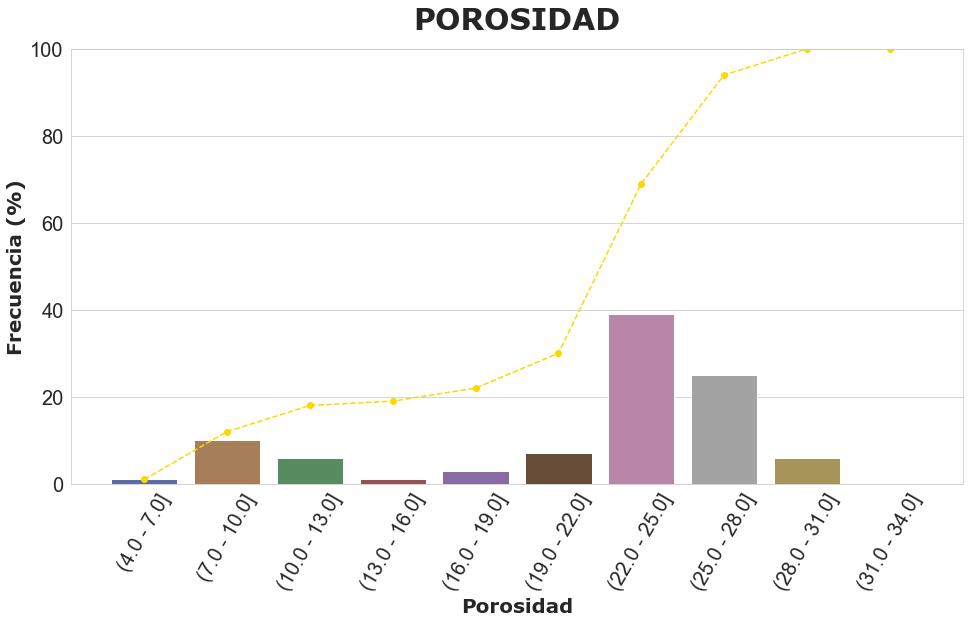

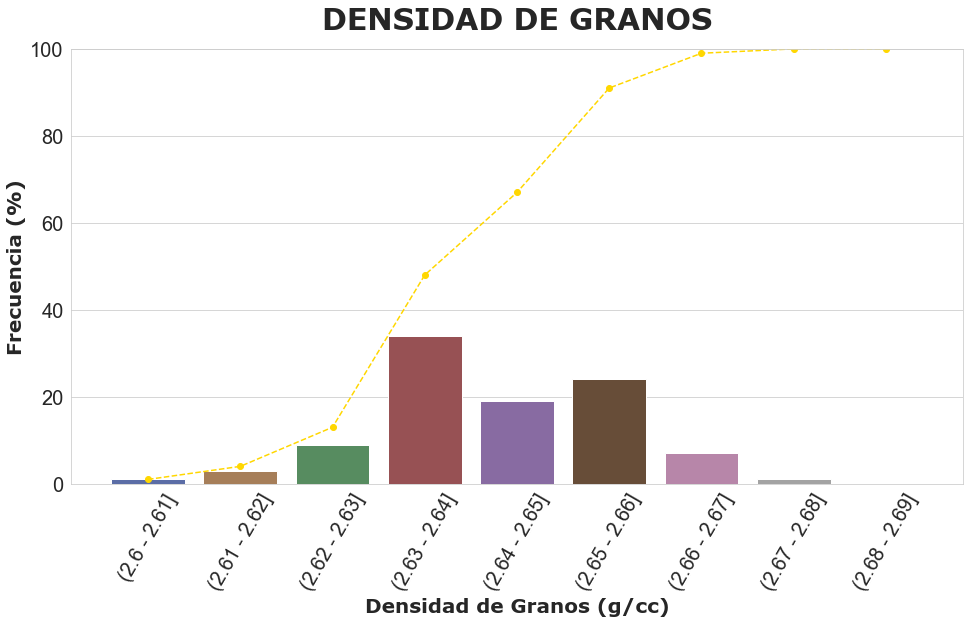

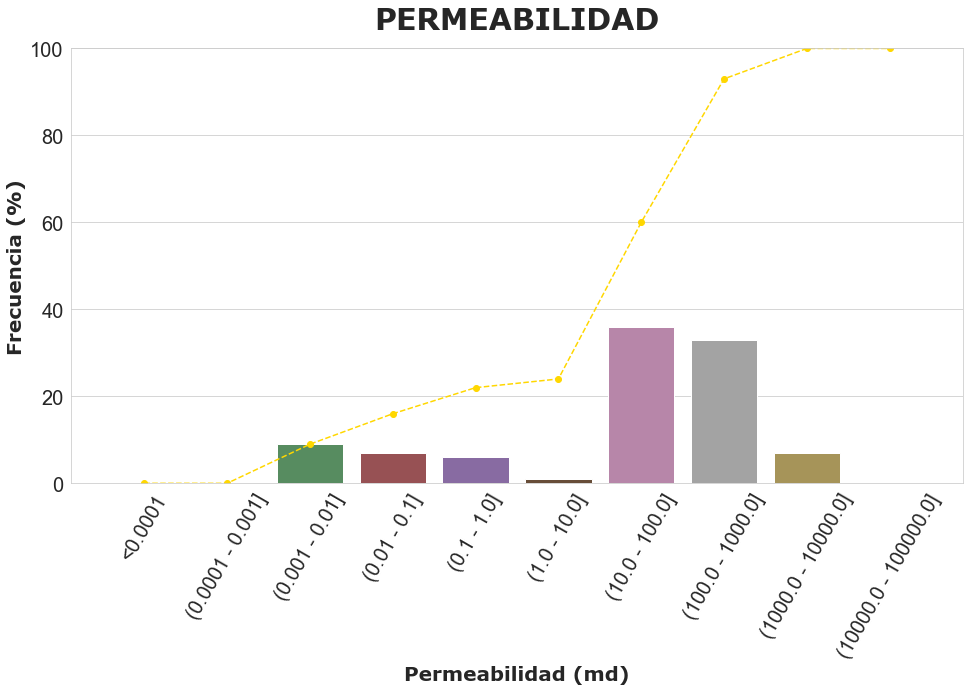

In [66]:

#Grafico para porosidad
sns.set_style('whitegrid')
sns.set_palette('bright')

fig=plt.figure(figsize = (16,8))
ax = sns.barplot(x = 'intervalos', y = '%frecuencia',data = df,saturation=.3)
sns.axes_style("whitegrid")
ax.set_title("POROSIDAD", y=1.03,fontsize=30, fontfamily='verdana',fontweight ='bold')
ax.set_xlabel("Porosidad",fontsize=20, fontfamily='verdana',fontweight ='bold')
ax.set_ylabel("Frecuencia (%)",fontsize=20, fontfamily='verdana',fontweight ='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60, size = 20)
plt.yticks(rotation=0,size=20)
plt.ylim(0,100)

ax.plot('%frecuencia_acu',data = df,linestyle="--", marker="o", color='gold')

plt.savefig('hist_Porosidad.png')

plt.show()



## Grafica para densidad de Granos
sns.set_style('whitegrid')
sns.set_palette('bright')

fig=plt.figure(figsize = (16,8))
ax = sns.barplot(x = 'intervalos', y = '%frecuencia',data = densidad_granos,saturation=.3)
sns.axes_style("whitegrid")
ax.set_title("DENSIDAD DE GRANOS", y=1.03,fontsize=30, fontfamily='verdana',fontweight ='bold')
ax.set_xlabel("Densidad de Granos (g/cc)",fontsize=20, fontfamily='verdana',fontweight ='bold')
ax.set_ylabel("Frecuencia (%)",fontsize=20, fontfamily='verdana',fontweight ='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60, size = 20)
plt.yticks(rotation=0,size=20)
plt.ylim(0,100)


ax.plot('%frecuencia_acu',data = densidad_granos,linestyle="--", marker="o", color='gold')
plt.savefig('hist_Densidad_Granos.png')

plt.show()



## Grafica para permeabilidad
sns.set_style('whitegrid')
sns.set_palette('bright')

fig=plt.figure(figsize = (16,8))
ax = sns.barplot(x = 'intervalos', y = '%frecuencia',data = permeabilidad,saturation=.3)
sns.axes_style("whitegrid")
ax.set_title("PERMEABILIDAD", y=1.03,fontsize=30, fontfamily='verdana',fontweight ='bold')
ax.set_xlabel("Permeabilidad (md)",fontsize=20, fontfamily='verdana',fontweight ='bold')
ax.set_ylabel("Frecuencia (%)",fontsize=20, fontfamily='verdana',fontweight ='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60, size = 20)
plt.yticks(rotation=0,size=20)
plt.ylim(0,100)


ax.plot('%frecuencia_acu',data = permeabilidad,linestyle="--", marker="o", color='gold')
plt.savefig('hist_Permeabilidad.png')
plt.show()

    